# notebook: using custom colormaps in napari

## Overview
Colormaps are an essential part of visualizing your image data, as they can affect how a user perceives your images (see the matplotlib docs for a [primer on colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html)). In this notebook, we will define and use custom colormaps in napari. After performing this exercise, you should be able to define a custom colormap and apply it to both existing and new `Image` layers.


## Loading the data

We will start by loading an image of DAPI stained nuclei. We can use `scikit-image`'s `imread()` function to download the data from the link below and load it into a numpy array called `nuclei`.

In [1]:
from skimage.io import imread

nuclei_url = 'https://raw.githubusercontent.com/alisterburt/napari-workshops/main/napari-workshops/notebooks/data/nuclei.tif'
nuclei = imread(nuclei_url)

## Viewing the image

As we did in the previous notebooks, we can view the image in napari using the `napari.view_image()` function. Here we set the colormap to `blue`. We additionally set the contrast limits and select a z slice where the nuclei are in focus.

In [2]:
import napari

viewer = napari.view_image(
    nuclei,
    colormap='blue',
    contrast_limits=(0, 0.4)
);

# choose the z slice where nuclei are in focus
viewer.dims.current_step = (30, 0, 0)

/Users/kyamauch/opt/miniconda3/envs/napari-tutorial/lib/python3.9/site-packages/napari/_vispy/vispy_camera.py:109: RuntimeWarning: divide by zero encountered in true_divide
  zoom = np.min(canvas_size / scale)


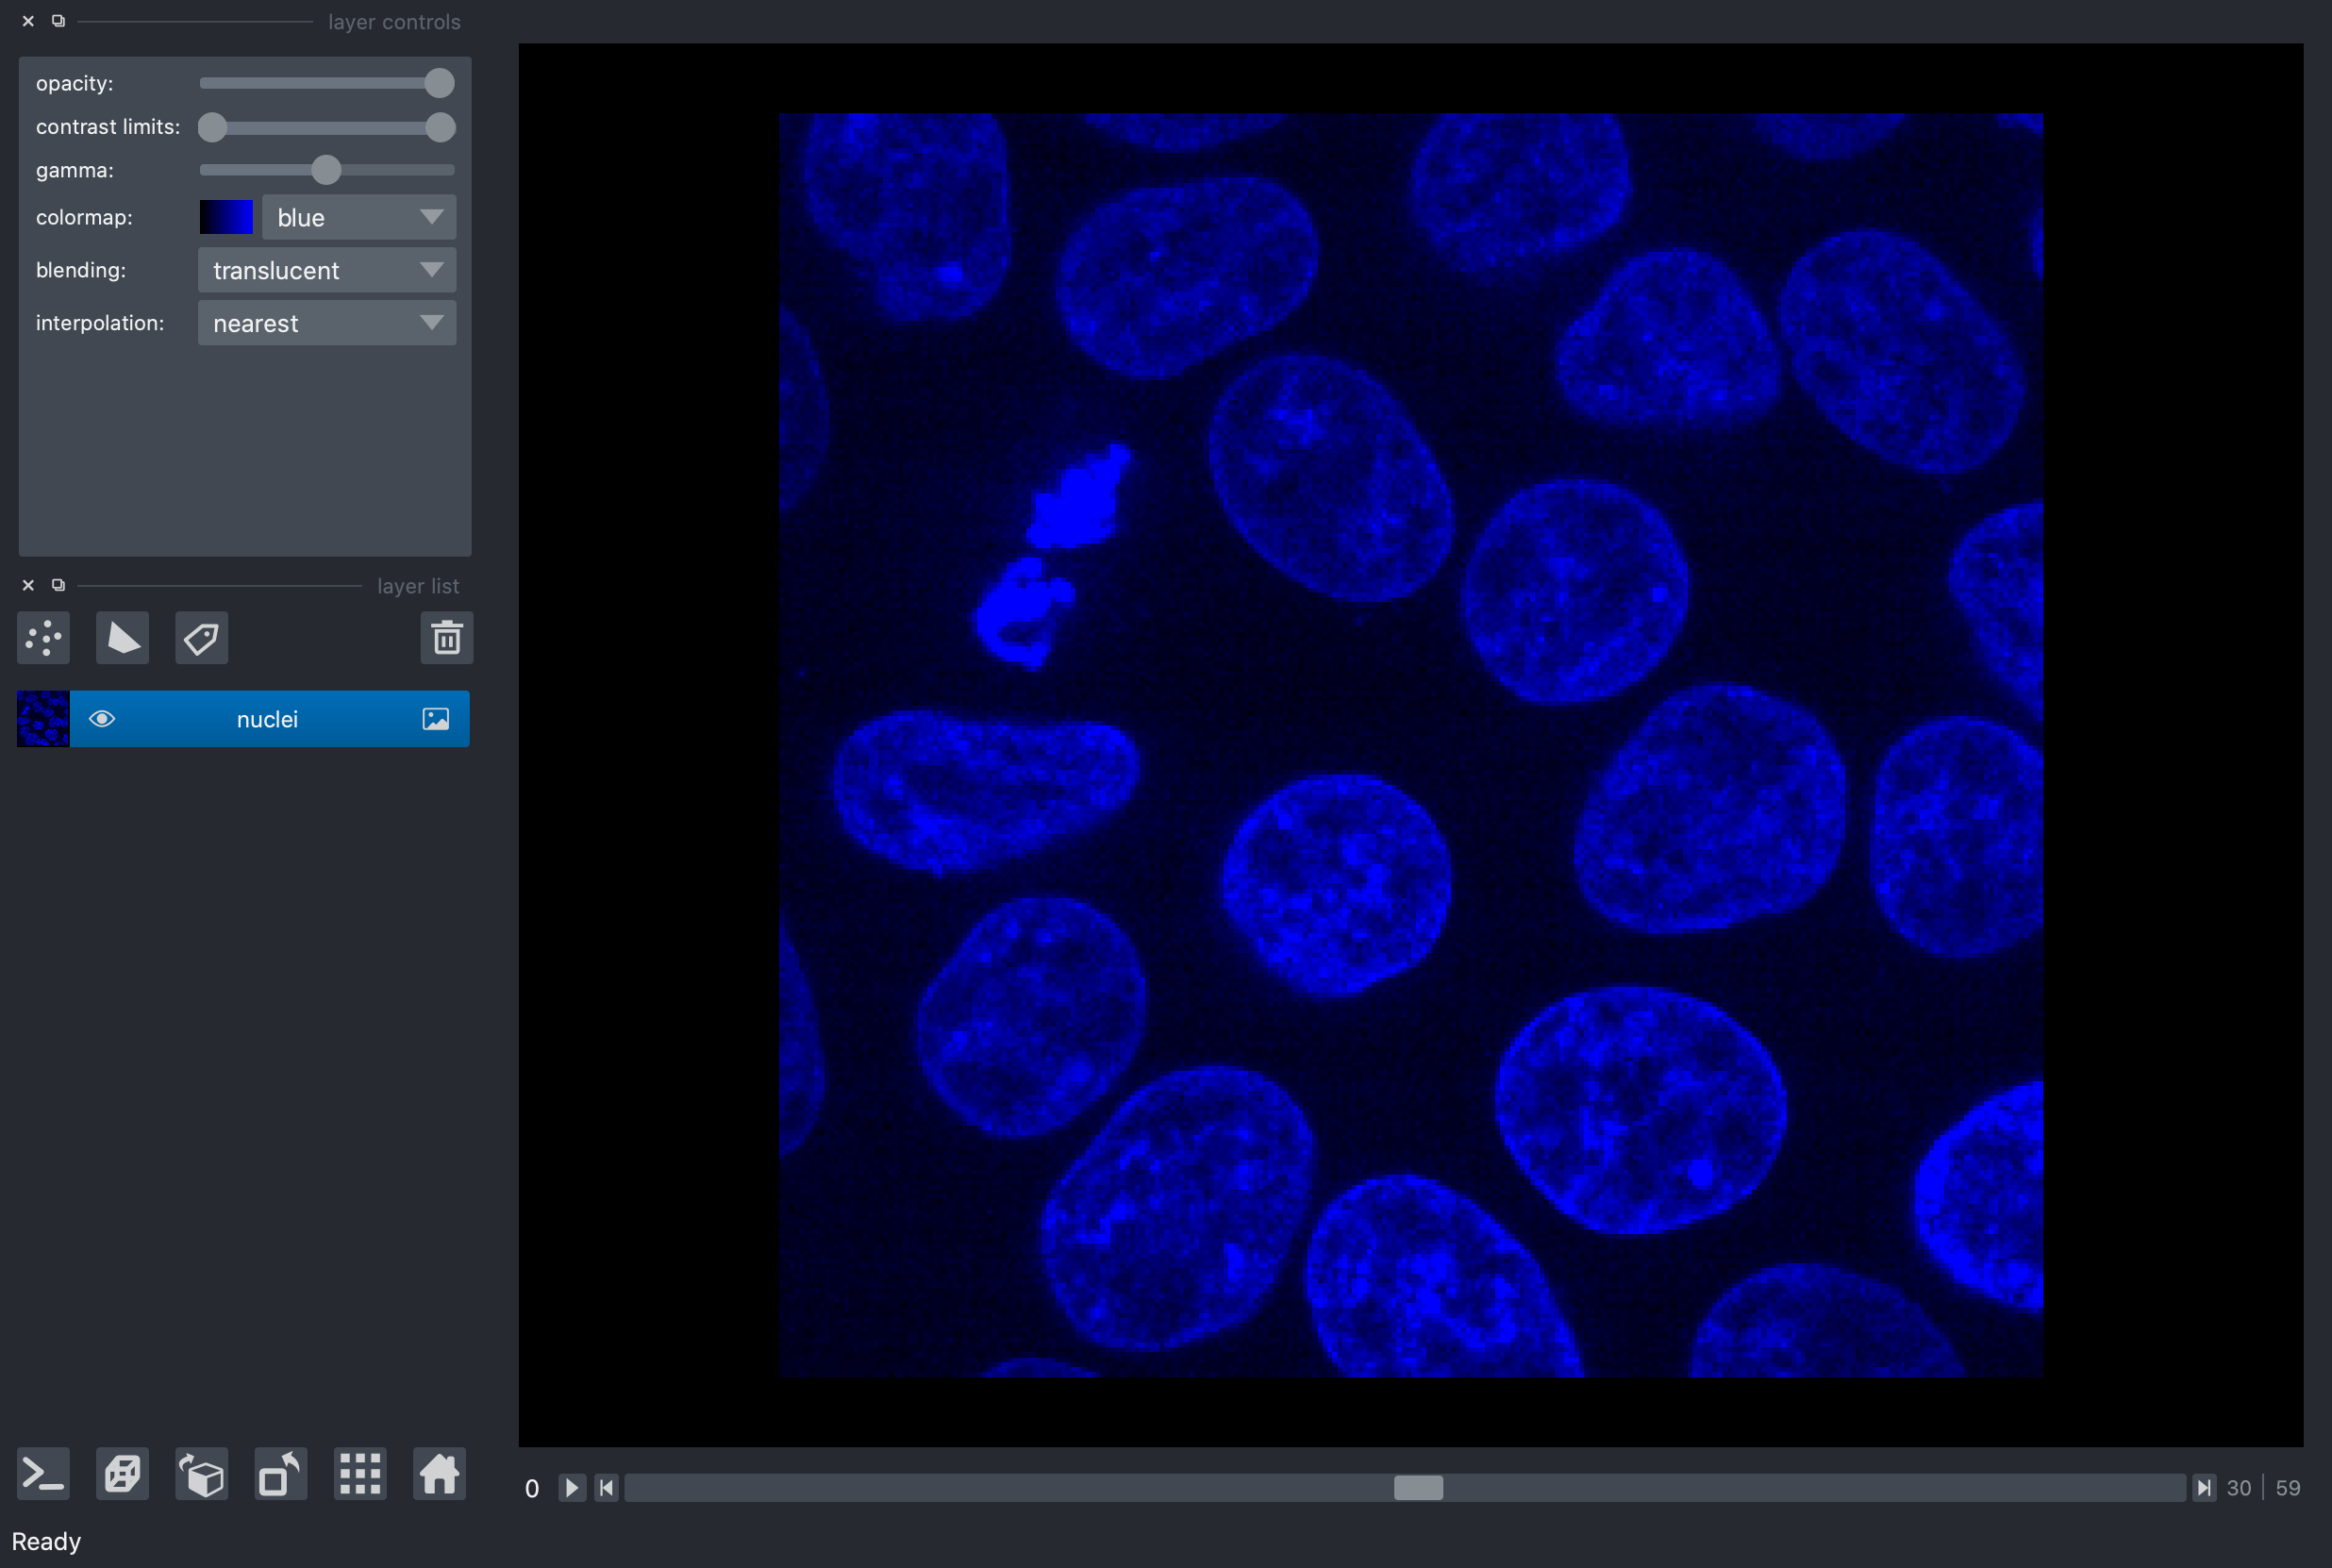

In [3]:
from napari.utils import nbscreenshot

nbscreenshot(viewer)

## Inspecting the colormap

We can inspect the current colormap via the `colormap` property of the `Image` layer.

In [4]:
viewer.layers[0].colormap

Colormap(colors=array([[0., 0., 0., 1.],
       [0., 0., 1., 1.]]), name='blue', interpolation='linear', controls=array([0., 1.]))

## Create the lookup table

To create the lookup table, we create an array of colors. The first element will map to pixels with the minimum value and the last value will map to the pixels with the maximum value. The colors are represented as RGBA (red, green, blue, alpha) values, where alpha is the opacity (i.e., 0 is completely transparent, 1 is completely opaque). In the example below, the colormap will go from white (`[1, 1, 1, 1]`) to blue (`[0, 0, 1, 1]`).

We use numpy linspace to interpolate colors between white and blue for demonstration purposes. However, as we will see below, if you just to linearly interpolate, you can just pass the end points (`[1, 1, 1, 1]` and `[0, 0, 1, 1]` in this case) and napari will do the interpolation for you.

In [5]:
import numpy as np

colors = np.linspace(
    start=[1, 1, 1, 1],
    stop=[0, 0, 1, 1],
    num=10,
    endpoint=True
)
print(colors)

[[1.         1.         1.         1.        ]
 [0.88888889 0.88888889 1.         1.        ]
 [0.77777778 0.77777778 1.         1.        ]
 [0.66666667 0.66666667 1.         1.        ]
 [0.55555556 0.55555556 1.         1.        ]
 [0.44444444 0.44444444 1.         1.        ]
 [0.33333333 0.33333333 1.         1.        ]
 [0.22222222 0.22222222 1.         1.        ]
 [0.11111111 0.11111111 1.         1.        ]
 [0.         0.         1.         1.        ]]


## Add the new colormap to the layer

We pass our new colormap to the layer as a dictionary. We use the following keys:
- colors: this is the array of colors the comprise the colormap lookup table
- name: this is the displayed name of the colormap
- interpolation: this is the interpolation mode that is applied to the lookup table. Here we use `'linear'` for linear interpolation.

In [6]:
new_colormap = {
    'colors': colors,
    'name': 'white_to_blue',
    'interpolation': 'linear'
}
viewer.layers[0].colormap = new_colormap

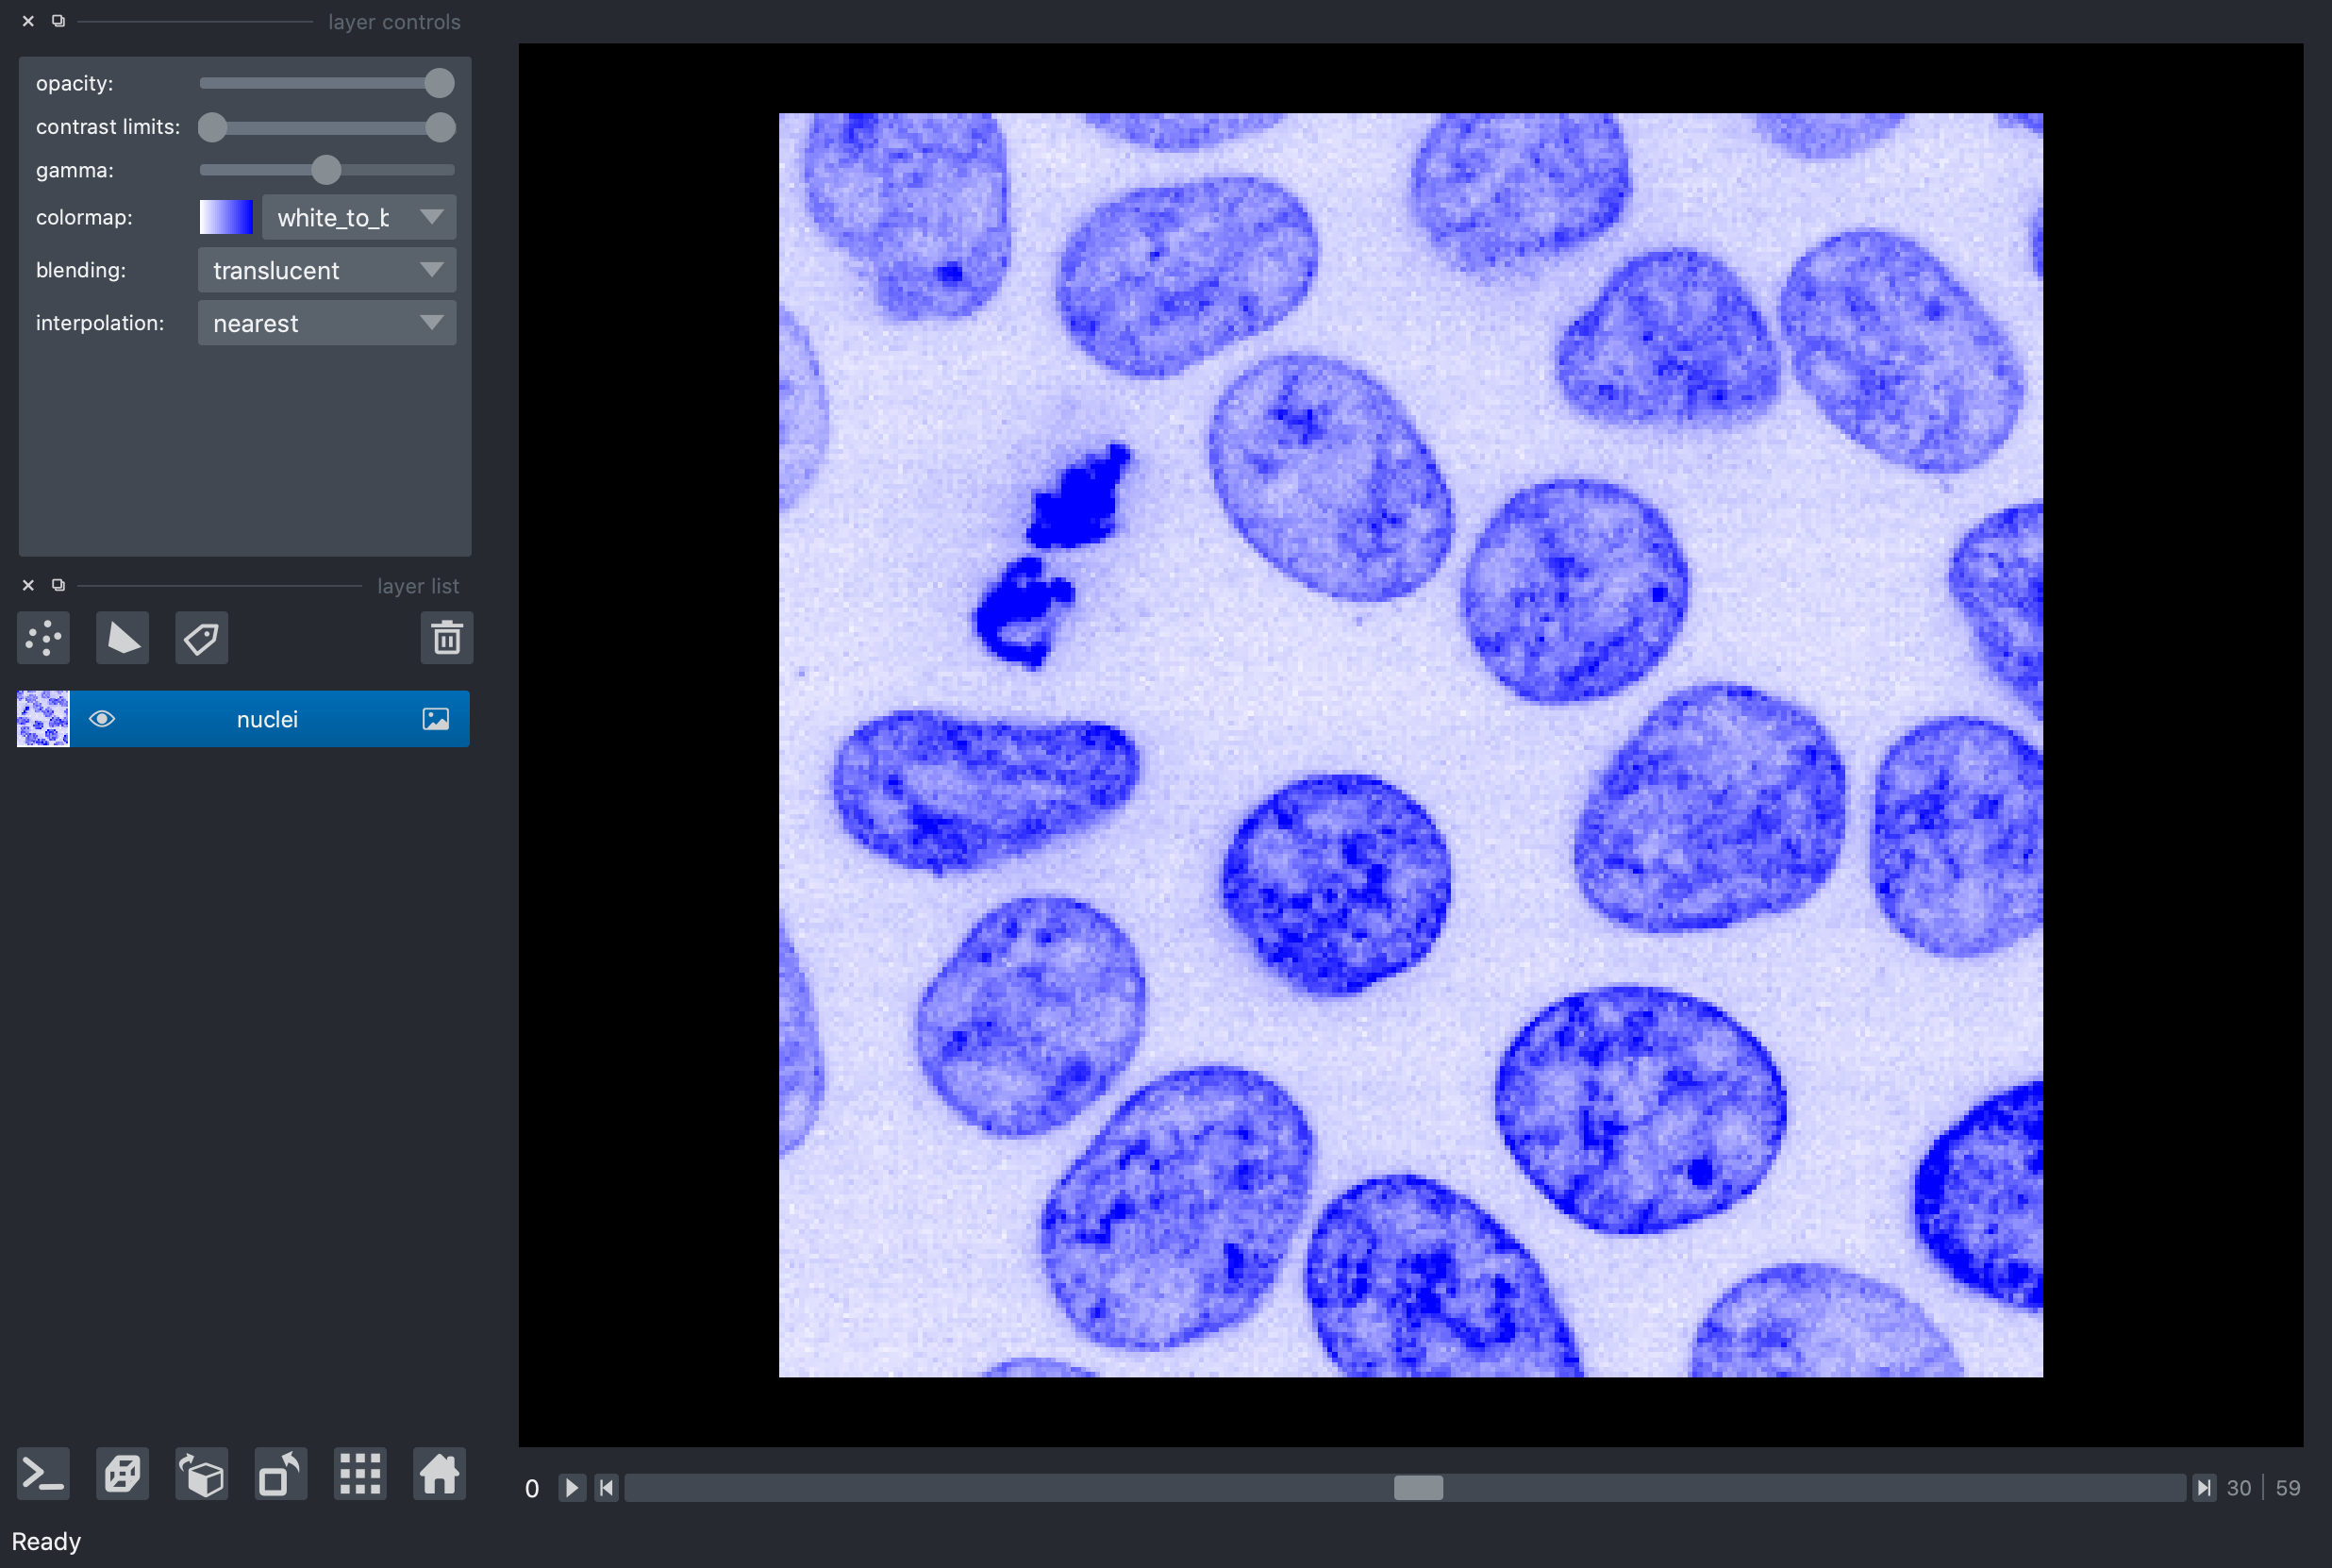

In [7]:
nbscreenshot(viewer)

## Use a custom colormap when creating a layer

We can also use a custom colormap when creating a new layer. We define the colormap as before. Note that since we are using linear interpolation, we can just define the end points of the look up table. In our `white_to_green` colormap, we just define the minimum value (white, `[1, 1, 1, 1]`) and the maximum value (green, `[0, 1, 0, 1]`). When constructing the new `Image` layer, we additionally set the `contrast_limits` and `opacity` to make the layer move visible.

In [8]:
# load the image data
membranes_url = 'https://raw.githubusercontent.com/alisterburt/napari-workshops/main/napari-workshops/notebooks/data/cell_membranes.tif'
membranes = imread(membranes_url)

In [9]:
white_green_cmap = {
    'colors': [[1, 1, 1, 1], [0, 1, 0, 1]],
    'name': 'white_to_green',
    'interpolation': 'linear'
}

viewer.add_image(
    membranes,
    colormap=white_green_cmap,
    contrast_limits=(0.02, 0.1),
    opacity=0.7
)

<Image layer 'membranes' at 0x7fc85c656340>

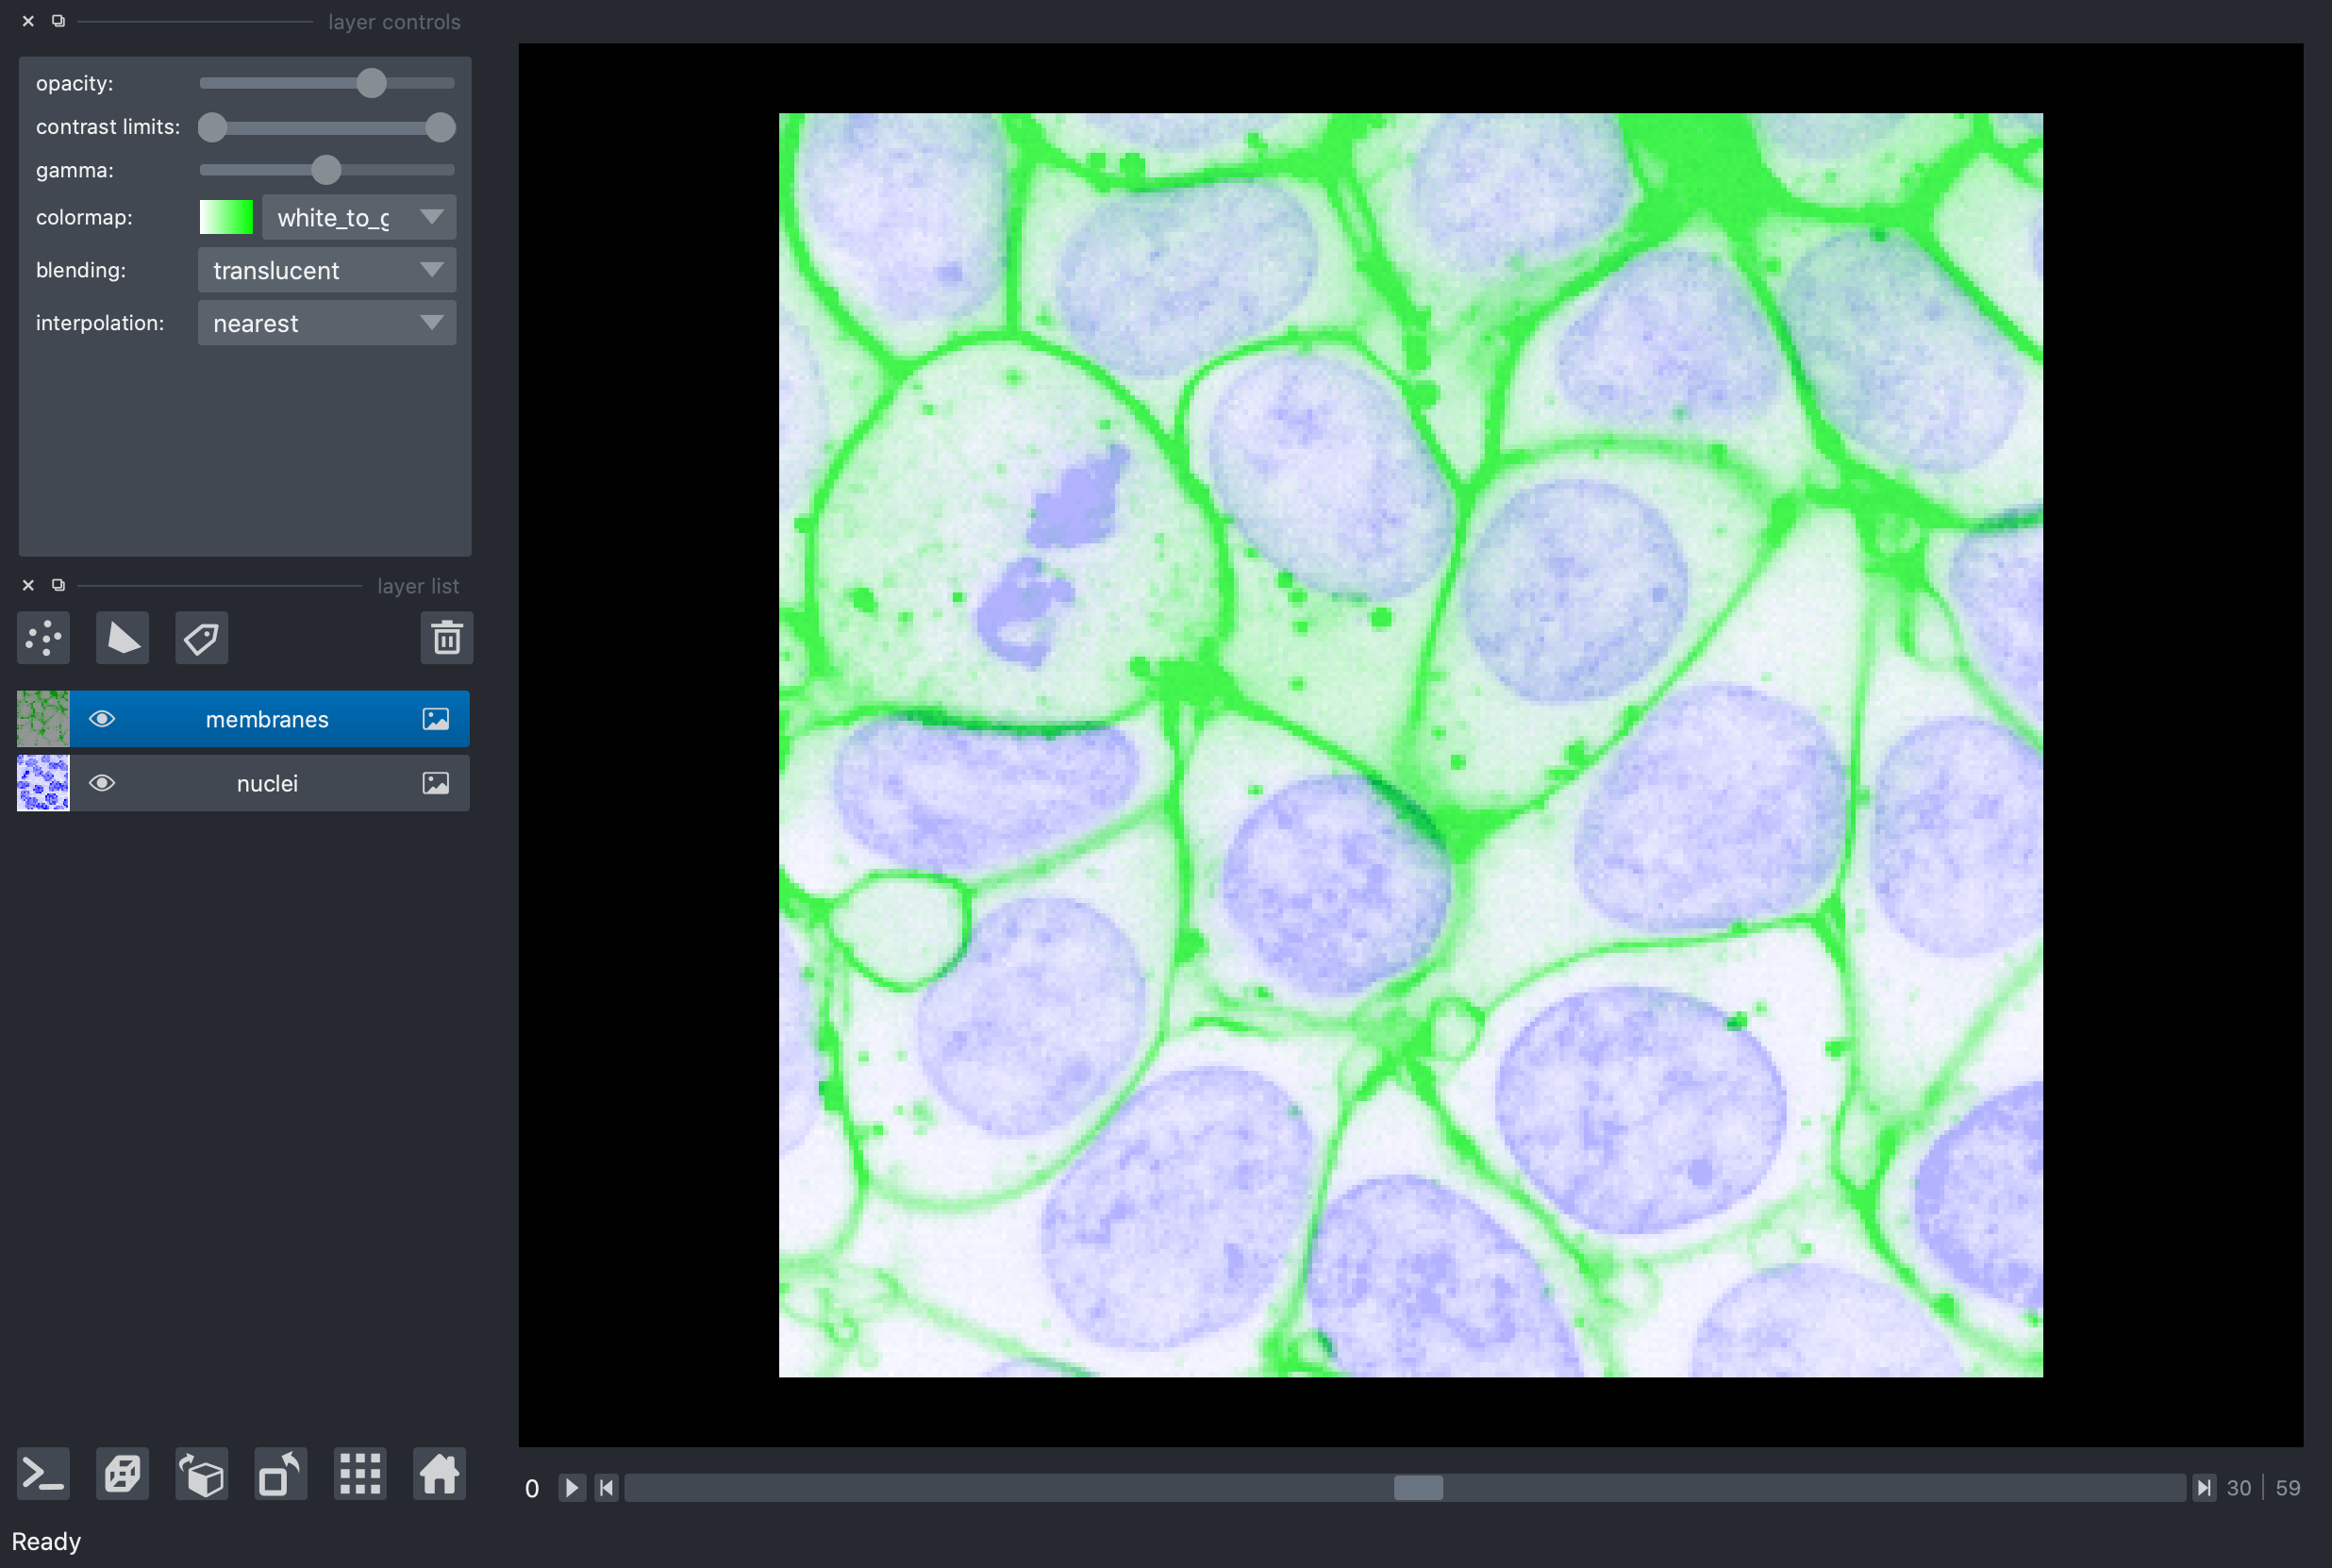

In [10]:
nbscreenshot(viewer)

# Conclusions

In this notebook, we have created and applied custom colormaps to `Image` layers. For additional information on colormaps in napari, please see the [`Image` layer tutorial](https://napari.org/tutorials/fundamentals/image.html#working-with-colormaps).